In [46]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [47]:
def convert_y(dataY):
    y = []
    for i in range (len(dataY)):
        if(dataY[i] > 50):
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

In [48]:
def convert_labels(x):
    y = []
    for i in range(len(x)):
        y.append((199.7-0.7*x[i][0])/199)
        # y.append([201-x[i][0]])
    return np.array(y)

In [49]:
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataX.head()
m = len(dataX) # Number of  examples
X = np.array(dataX)

dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY.head()
Y = np.array(dataY)
Y = convert_y(Y)
Y = np.array(Y)
print(Y)


[1 1 1 ... 0 0 0]


score :  0.6929411764705883
Confusion Matrix is :
[[546  34]
 [227  43]]
Accuracy is: 0.6929411764705883
Recall is: 0.16

score :  0.6705882352941176
Confusion Matrix is :
[[521  19]
 [261  49]]
Accuracy is: 0.6705882352941176
Recall is: 0.16

score :  0.6925795053003534
Confusion Matrix is :
[[588   0]
 [261   0]]
Accuracy is: 0.6925795053003534
Recall is: 0.0

score :  0.6584216725559482
Confusion Matrix is :
[[538  17]
 [273  21]]
Accuracy is: 0.6584216725559482
Recall is: 0.07

score :  0.6548881036513545
Confusion Matrix is :
[[556   0]
 [293   0]]
Accuracy is: 0.6548881036513545
Recall is: 0.0



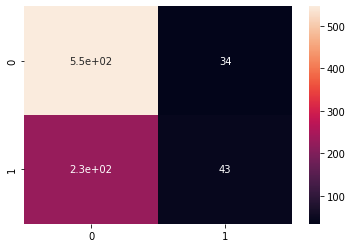

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import seaborn as sns 

# for train_index, test_index in kf.split(X):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
#     # model = SVC(decision_function_shape = "ovr")
#     # model.fit(X_train, y_train)
#     y_predicted = OneVsRestClassifier(LinearSVC(random_state=0,max_iter=10000)).fit(X_train, y_train).predict(X_test)
#     print("score : ", accuracy_score(y_test, y_predicted))
#     # confusionM = confusion_matrix(y_test,y_predicted )
#     # print("Confusion Matrix is :")
#     # print(confusionM)
#     # print("Accuracy is:",accuracy_score(y_test, y_predicted))
#     # TP = confusionM[1][1]
#     # TN = confusionM[0][0]
#     # FN = confusionM[1][0]
#     # FP = confusionM[0][1]
#     # precision = TP/(TP+FP)
#     # recall = TP/(TP+FN)
#     # print("Precison is:", round(precision,2))
#     # print("Recall is:", round(recall, 2))
#     print()

# #     y_predicted = model.predict()
kf = KFold(n_splits=5)
i =0
for train_index, test_index in kf.split(X):
    i+=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = SVC(C=0.1, gamma = 1, kernel = 'linear')
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print("score : ", accuracy_score(y_test, y_predicted))
    confusionM = confusion_matrix(y_test,y_predicted )
    print("Confusion Matrix is :")
    print(confusionM)
    print("Accuracy is:",accuracy_score(y_test, y_predicted))
    TP = confusionM[1][1]
    TN = confusionM[0][0]
    FN = confusionM[1][0]
    FP = confusionM[0][1]
#     precision = TP/(TP+FP)
    recall = TP/(TP+FN)
#     print("Precison is:", round(precision,2))
    print("Recall is:", round(recall, 2))
    print()
    class_names = ["Not Hit", "Hit"]

#     plt.plot()
    cm = confusion_matrix(y_test, y_predicted, labels=model.classes_)
    if (i==1):
        sns.heatmap(cm, annot =True)
    
    
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# #     
# #     disp = ConfusionMatrixDisplay.from_estimator( model, X_test, y_test, display_labels=class_names,cmap=plt.cm.Blues, normalize=True)

    
# #     class_names = ["Not Hit", "Hit"]
# #     
# #     disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, display_labels=class_names,cmap=plt.cm.Blues, normalize=True)
# #     disp.ax_.set_title(title)
# #     disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

# #     print(title)
# #     print(disp.confusion_matrix)
#     disp.plot()
#     plt.show()

#     y_predicted = model.predict()